## Importing packages

In [1]:
import numpy
import scipy
import matplotlib
#importing packages

In [2]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm
#importing packages

digits = datasets.load_digits()
#loading digits in size 8x8
type(digits.data[1]) #checking type of data

numpy.ndarray

## Viewing the data with 8x8 images

In [7]:
print(digits.data)
print(digits.target)
#viewing data

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]


## Viewing example of the image of the number

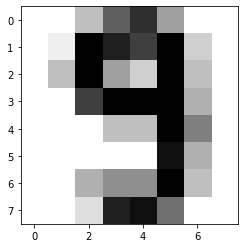

In [8]:
plt.imshow(digits.images[-5], cmap=plt.cm.gray_r, interpolation='nearest')
#example - fifth last digit
plt.show()
#this digit was classified by model as 9

## Building model

In [9]:
X,y = digits.data[:-450], digits.target[:-450]
clf = svm.SVC(gamma=0.001, C=100)
X=X.reshape(-1,64)
clf.fit(X,y)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [10]:
X_test=digits.data[1797-450:1797].reshape(-1,64)
y_test=digits.target[1797-450:1797]
acc = round(clf.score(X_test,y_test), 4)
print("Accuracy: %0.4f" % (acc))
#it's easy to get high accuracy

Accuracy: 0.9689


## Checking the values misclassified by the model

In [17]:
for i in range(1797):
    if clf.predict(digits.data[i].reshape(-1,64))[0] != digits.target[i]:
        print(clf.predict(digits.data[i].reshape(-1,64))," ",digits.target[i])
#left - prediction, right - real value

[6]   5
[1]   8
[4]   0
[8]   3
[9]   4
[9]   4
[8]   9
[9]   4
[5]   9
[8]   3
[8]   3
[8]   3
[5]   3
[5]   3


## Classification of 28x28 images

In [35]:
import pandas
data = pandas.read_csv('mnist_data.csv')

In [50]:
data.columns[0]  #name of column with classes

'7'

## Splitting the dataset into train and test sets

In [57]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.2)

## Building example of model with some values of gamma and C

In [61]:
clf = svm.SVC(gamma=0.0001, C=100)
X,y = train[data.columns[1:785]], train['7'] 
clf.fit(X,y)
#the model is learning about 3 minutes

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [62]:
X_test, y_test = test[data.columns[1:785]], test['7'] 
acc = round(clf.score(X_test,y_test), 4)
print("Accuracy: %0.4f" % (acc))
#low accuracy, because gamma was high

Accuracy: 0.1085


## Checking model for different values of gamma and C

In [68]:
gamma_values = [1e-4, 4e-8, 1e-9]
C_values = [10, 100, 1000]

In [72]:
all_results = []
for gamma in gamma_values:
    results_this_gamma = []
    for C in C_values:
        clf = svm.SVC(gamma = gamma, C = C)
        clf.fit(X,y)
        acc = round(clf.score(X_test,y_test), 4)
        results_this_gamma.append(acc)
    all_results.append(results_this_gamma)

In [73]:
all_results

[[0.1085, 0.1085, 0.1085], [0.9505, 0.9515, 0.9515], [0.9045, 0.9295, 0.9285]]

In [ ]:
#the best result was with gamma = 4e-8, C had little impact on result, 
#but 100 and 1000 gave better result than 10

In [75]:
clf = svm.SVC(gamma='auto',C=100)
clf.fit(X,y)
acc = round(clf.score(X_test,y_test), 4)
acc

0.1085